In [ ]:
import pandas as pd

df = pd.read_csv('electricityConsumptionAndProductioction.csv')


In [ ]:
print(df.head())

              DateTime  Consumption  Production  Nuclear  Wind  Hydroelectric  \
0  2019-01-01 00:00:00         6352        6527     1395    79           1383   
1  2019-01-01 01:00:00         6116        5701     1393    96           1112   
2  2019-01-01 02:00:00         5873        5676     1393   142           1030   
3  2019-01-01 03:00:00         5682        5603     1397   191            972   
4  2019-01-01 04:00:00         5557        5454     1393   159            960   

   Oil and Gas  Coal  Solar  Biomass  
0         1896  1744      0       30  
1         1429  1641      0       30  
2         1465  1616      0       30  
3         1455  1558      0       30  
4         1454  1458      0       30  


In [ ]:
print(df.isnull().sum())

DateTime         0
Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64


In [ ]:
print(df.describe())

        Consumption    Production       Nuclear          Wind  Hydroelectric  \
count  46011.000000  46011.000000  46011.000000  46011.000000   46011.000000   
mean    6587.616440   6518.645628   1291.177501    792.310882    1857.052444   
std     1043.654923    986.805018    236.549637    675.812712     692.592157   
min     3889.000000   3315.000000    562.000000    -26.000000     175.000000   
25%     5773.000000   5814.000000   1347.000000    236.000000    1347.000000   
50%     6552.000000   6462.000000   1383.000000    592.000000    1747.000000   
75%     7321.000000   7176.000000   1405.000000   1205.000000    2265.000000   
max     9615.000000   9886.000000   1457.000000   2811.000000    4434.000000   

        Oil and Gas          Coal         Solar       Biomass  
count  46011.000000  46011.000000  46011.000000  46011.000000  
mean    1171.890418   1193.157332    156.688031     55.851862  
std      434.748917    320.449368    229.502650     14.235554  
min      198.000000    

In [ ]:

df['DateTime'] = pd.to_datetime(df['DateTime'])


In [ ]:
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
data_types = df.dtypes

In [ ]:
for column, data_type in data_types.items():
    if pd.api.types.is_numeric_dtype(data_type):
        print(f"{column} contains numeric values.")
    elif pd.api.types.is_categorical_dtype(data_type):
        print(f"{column} contains categorical values.")
    else:
        print(f"{column} contains other types of data.")

DateTime contains other types of data.
Consumption contains numeric values.
Production contains numeric values.
Nuclear contains numeric values.
Wind contains numeric values.
Hydroelectric contains numeric values.
Oil and Gas contains numeric values.
Coal contains numeric values.
Solar contains numeric values.
Biomass contains numeric values.
Year contains numeric values.
Month contains numeric values.
Day contains numeric values.
Hour contains numeric values.
Minute contains numeric values.
Second contains numeric values.


In [ ]:
numeric_columns = ['Consumption', 'Production', 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
df_numeric = df[numeric_columns]

def detect_outliers(df, columns, threshold=1.5):
    outliers = pd.DataFrame()
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (threshold * iqr)
        upper_bound = q3 + (threshold * iqr)
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, column_outliers])
    return outliers

outliers = detect_outliers(df_numeric, numeric_columns)

print("Outliers:")
print(outliers)

Outliers:
       Consumption  Production  Nuclear  Wind  Hydroelectric  Oil and Gas  \
1091          8876        9232     1368  1714           1856         1856   
1377          8691        9430     1371  2410           1338         1600   
1378          8570        9295     1387  2513           1459         1469   
1379          8481        9303     1385  2488           1501         1477   
1380          8443        9302     1346  2272           1520         1512   
...            ...         ...      ...   ...            ...          ...   
45978         4690        6471     1396  1483           1089          989   
45979         4882        6528     1395  1466           1263         1013   
45998         4563        5609     1394   426           1296          889   
45999         4430        5609     1395   462           1130          672   
46000         4428        5577     1396   414            983          670   

       Coal  Solar  Biomass  
1091   2069    300       68  
1377 

In [ ]:
df['DayOfWeek'] = df['DateTime'].dt.dayofweek  # 0 for Monday, 1 for Tuesday, ..., 6 for Sunday
df['Weekday'] = df['DateTime'].dt.weekday  # 0 for Monday, 1 for Tuesday, ..., 4 for Friday (assuming weekday)
df['TimeOfDay'] = pd.cut(df['Hour'], bins=[-1, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])


def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

df['Season'] = df['Month'].apply(get_season)


In [ ]:
df.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Year,Month,Day,Hour,Minute,Second,DayOfWeek,Weekday,TimeOfDay,Season
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30,2019,1,1,0,0,0,1,1,Night,Winter
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30,2019,1,1,1,0,0,1,1,Night,Winter
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30,2019,1,1,2,0,0,1,1,Night,Winter
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30,2019,1,1,3,0,0,1,1,Night,Winter
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30,2019,1,1,4,0,0,1,1,Night,Winter


In [ ]:
energy_sources = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
df['Total'] = df[energy_sources].sum(axis=1)
for source in energy_sources:
    df[f'{source}_Ratio'] = df[source] / df['Total']


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression


df['DateTime'] = pd.to_datetime(df['DateTime'])

df.sort_values(by='DateTime', inplace=True)


X = df['DateTime'].apply(lambda x: x.toordinal()).values.reshape(-1, 1)
y = df['Consumption'].values


model = LinearRegression()
model.fit(X, y)


trend_feature = model.coef_[0]
print("Trend feature (consumption):", trend_feature)


Trend feature (consumption): -0.444869744355388


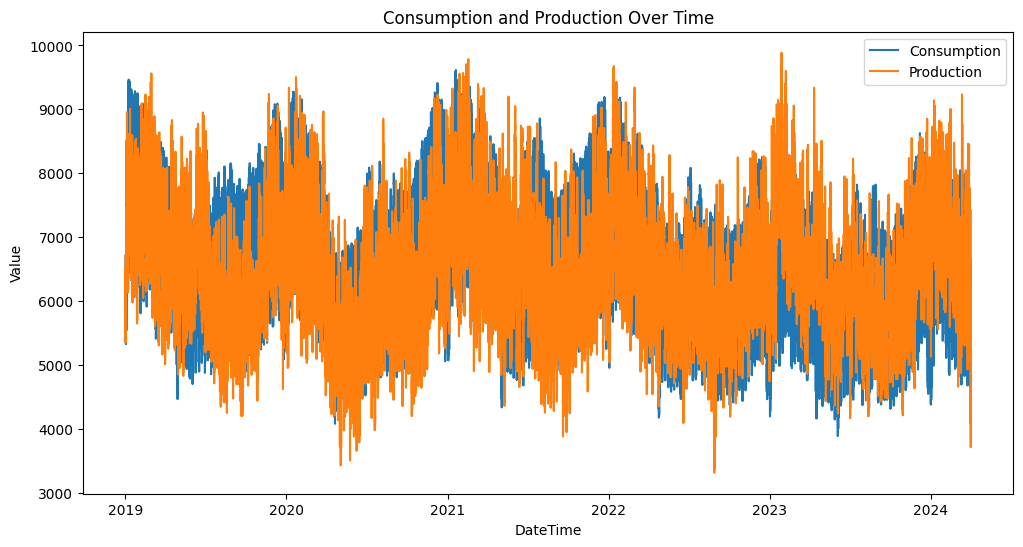

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Consumption'], label='Consumption')
plt.plot(df['DateTime'], df['Production'], label='Production')
plt.xlabel('DateTime')
plt.ylabel('Value')
plt.title('Consumption and Production Over Time')
plt.legend()
plt.show()


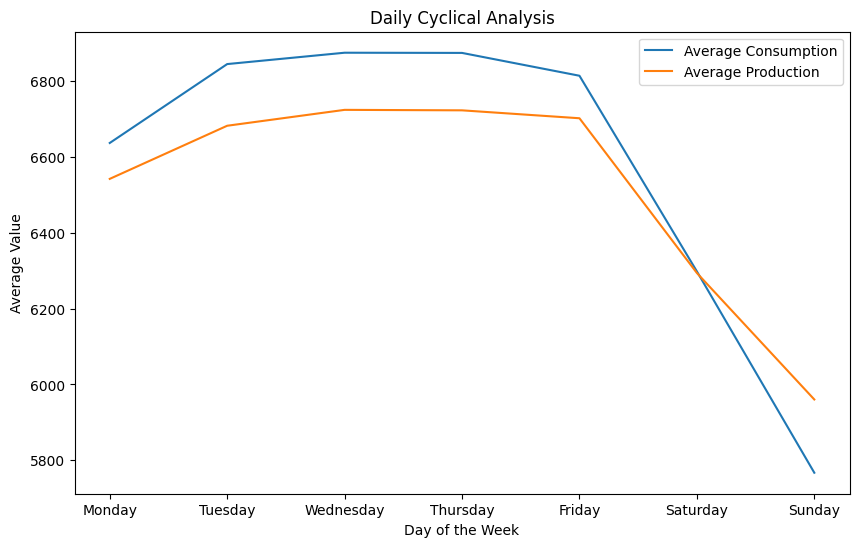

In [ ]:

daily_avg_consumption = df.groupby('DayOfWeek')['Consumption'].mean()
daily_avg_production = df.groupby('DayOfWeek')['Production'].mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_avg_consumption, label='Average Consumption')
plt.plot(daily_avg_production, label='Average Production')
plt.xlabel('Day of the Week')
plt.ylabel('Average Value')
plt.title('Daily Cyclical Analysis')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend()
plt.show()


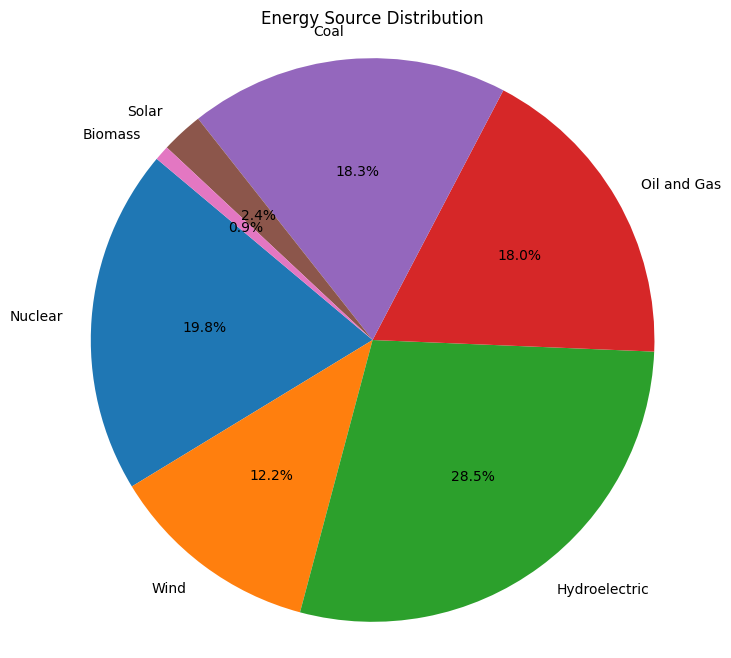

In [ ]:
total_energy = df[energy_sources].sum()
plt.figure(figsize=(8, 8))
plt.pie(total_energy, labels=energy_sources, autopct='%1.1f%%', startangle=140)
plt.title('Energy Source Distribution')
plt.axis('equal')
plt.show()

In [ ]:
pip install --upgrade statsmodels


In [ ]:
print(df.head())

             DateTime  Consumption  Production  Nuclear  Wind  Hydroelectric  \
0 2019-01-01 00:00:00         6352        6527     1395    79           1383   
1 2019-01-01 01:00:00         6116        5701     1393    96           1112   
2 2019-01-01 02:00:00         5873        5676     1393   142           1030   
3 2019-01-01 03:00:00         5682        5603     1397   191            972   
4 2019-01-01 04:00:00         5557        5454     1393   159            960   

   Oil and Gas  Coal  Solar  Biomass  ...  TimeOfDay  Season  Total  \
0         1896  1744      0       30  ...      Night  Winter   6527   
1         1429  1641      0       30  ...      Night  Winter   5701   
2         1465  1616      0       30  ...      Night  Winter   5676   
3         1455  1558      0       30  ...      Night  Winter   5603   
4         1454  1458      0       30  ...      Night  Winter   5454   

   Nuclear_Ratio  Wind_Ratio  Hydroelectric_Ratio  Oil and Gas_Ratio  \
0       0.213728    

In [ ]:
pip install prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmp2s7sellh/n5a7e3ur.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2s7sellh/k4y67r7w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44600', 'data', 'file=/tmp/tmp2s7sellh/n5a7e3ur.json', 'init=/tmp/tmp2s7sellh/k4y67r7w.json', 'output', 'file=/tmp/tmp2s7sellh/prophet_model8xi90zl_/prophet_model-20240526111624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:16:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:17:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 515.9899662152243
Accuracy: 0.857670578009561
F1 Score: 0.8338828303322344


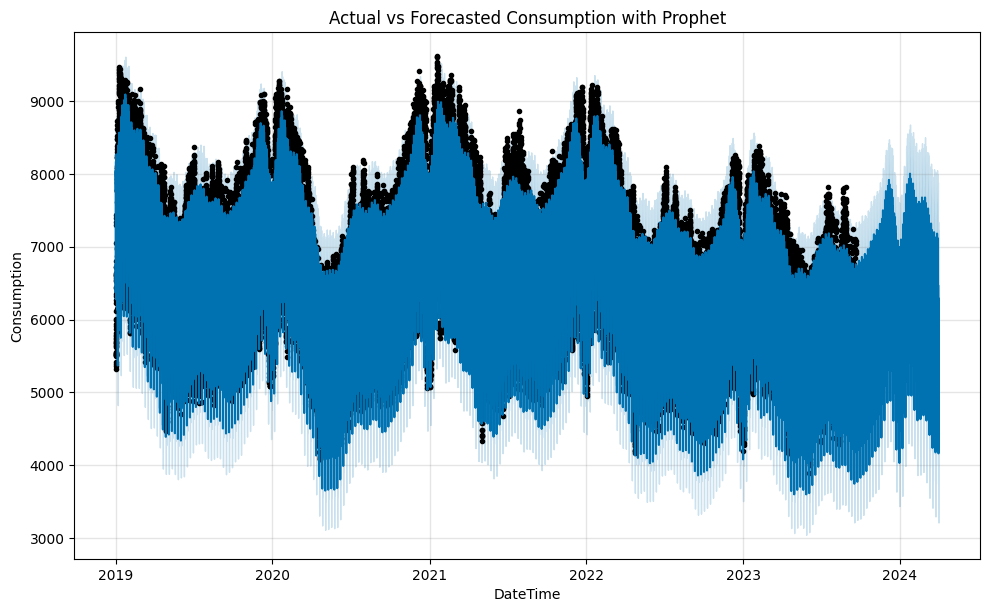

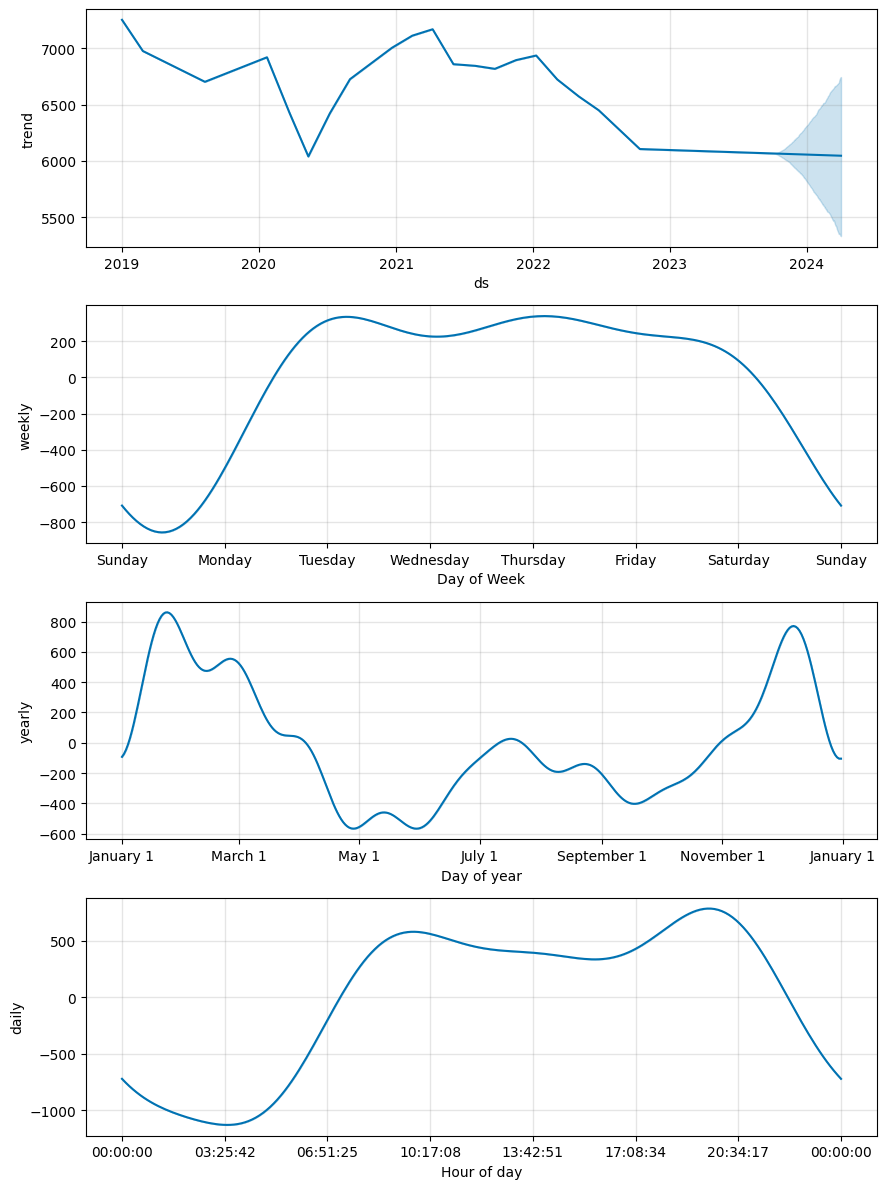

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
import numpy as np

# Assuming 'df' is your DataFrame
# Ensure DateTime is a datetime object
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Sort the DataFrame by DateTime
df = df.sort_values('DateTime')

# Split the data into training and testing sets
train_size = int(len(df) * 0.9)
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

# Prepare the data in the format Prophet expects
df_train_prophet = df_train.reset_index()
df_train_prophet = df_train_prophet.rename(columns={'DateTime': 'ds', 'Consumption': 'y'})
df_test_prophet = df_test.reset_index()
df_test_prophet = df_test_prophet.rename(columns={'DateTime': 'ds', 'Consumption': 'y'})

model = Prophet(changepoint_prior_scale=0.1, seasonality_prior_scale=0.1)
# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(df_train_prophet)

# Create a DataFrame to hold the future dates for which we want a prediction
future = model.make_future_dataframe(periods=len(df_test), freq='H')

# Use the model to make a forecast
forecast = model.predict(future)

# Extract the predicted values for the test period
y_pred = forecast['yhat'][-len(df_test):].values
y_true = df_test['Consumption'].values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {rmse}")

# Convert predictions to binary for accuracy and F1 score
threshold = np.median(df['Consumption'])
y_pred_binary = (y_pred > threshold).astype(int)
y_true_binary = (y_true > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_true_binary, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Calculate F1 score
f1 = f1_score(y_true_binary, y_pred_binary)
print(f"F1 Score: {f1}")

# Plot the forecast
fig1 = model.plot(forecast)
plt.xlabel('DateTime')
plt.ylabel('Consumption')
plt.title('Actual vs Forecasted Consumption with Prophet')
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()


Epoch 1/10
1150/1150 [==============================] - 31s 25ms/step - loss: 0.0034 - val_loss: 0.0010
Epoch 2/10
1150/1150 [==============================] - 27s 23ms/step - loss: 7.7135e-04 - val_loss: 9.0495e-04
Epoch 3/10
1150/1150 [==============================] - 16s 14ms/step - loss: 6.9403e-04 - val_loss: 8.8675e-04
Epoch 4/10
1150/1150 [==============================] - 16s 14ms/step - loss: 6.6601e-04 - val_loss: 8.4563e-04
Epoch 5/10
1150/1150 [==============================] - 18s 15ms/step - loss: 6.4271e-04 - val_loss: 0.0011
Epoch 6/10
1150/1150 [==============================] - 16s 14ms/step - loss: 6.1790e-04 - val_loss: 8.1826e-04
Epoch 7/10
1150/1150 [==============================] - 16s 14ms/step - loss: 6.1037e-04 - val_loss: 9.3474e-04
Epoch 8/10
1150/1150 [==============================] - 16s 14ms/step - loss: 5.8399e-04 - val_loss: 8.4093e-04
Epoch 9/10
1150/1150 [==============================] - 16s 14ms/step - loss: 5.5753e-04 - val_loss: 8.6145e-04
Epoc

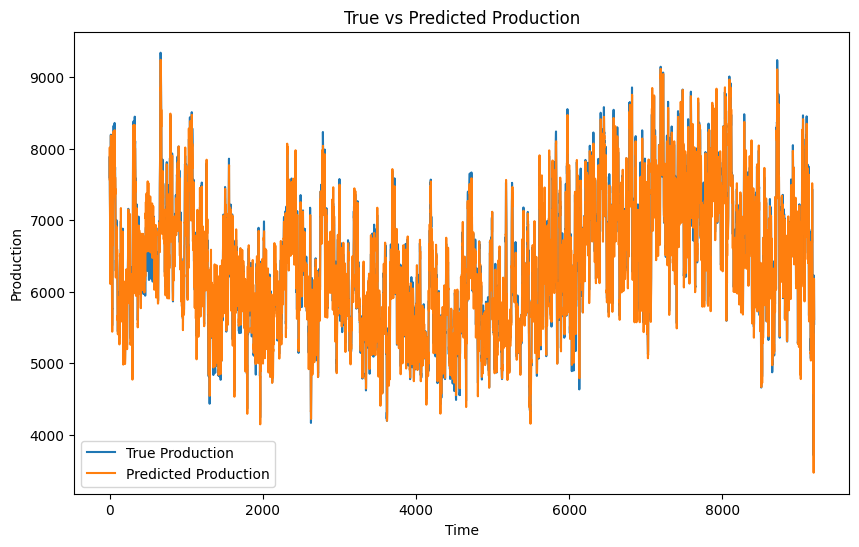

Model Evaluation Metrics:
Mean Absolute Error (MAE): 141.2765386539533
Mean Squared Error (MSE): 37273.76256663763
Root Mean Squared Error (RMSE): 193.0641410688107
R-squared (R2): 0.9541862559340109
Classification Metrics:
Accuracy: 0.9362904979343335
F1 Score: 0.9357456140350876


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score

# Load your data into a DataFrame 'df'
# Assuming 'df' is your DataFrame
# Prepare the data by separating features and target
features = df.drop(['Production', 'DateTime'], axis=1)
target = df[['Production']]

# One-hot encode categorical features
categorical_columns = ['TimeOfDay', 'Season', 'DayOfWeek', 'Month']
features = pd.get_dummies(features, columns=categorical_columns)

# Scale numerical features
numerical_columns = features.columns
feature_scaler = MinMaxScaler()
scaled_features = feature_scaler.fit_transform(features[numerical_columns])

# Scale target
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(target)

# Create sequences for LSTM
def create_sequences(features, target, time_steps=24):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:(i + time_steps)])
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 24
X, y = create_sequences(scaled_features, scaled_target, time_steps)

# Split into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and true values
predictions = target_scaler.inverse_transform(predictions)
y_test = target_scaler.inverse_transform(y_test)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Production')
plt.plot(predictions, label='Predicted Production')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Production')
plt.title('True vs Predicted Production')
plt.show()

# Calculate regression metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Convert to binary classes using median as threshold
threshold = np.median(y_test)
y_test_binary = (y_test > threshold).astype(int)
predictions_binary = (predictions > threshold).astype(int)

# Calculate classification metrics
accuracy = accuracy_score(y_test_binary, predictions_binary)
f1 = f1_score(y_test_binary, predictions_binary)

print("Classification Metrics:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Evaluation for Consumption:
Mean Absolute Error: 318.3241353363034
Mean Squared Error: 179844.47307716362
Root Mean Squared Error: 424.0807388660367

Evaluation for Production:
Mean Absolute Error: 68.72203411930892
Mean Squared Error: 11510.537355536238
Root Mean Squared Error: 107.2871723717996

Evaluation for Nuclear:
Mean Absolute Error: 13.115551450613928
Mean Squared Error: 412.53779643594476
Root Mean Squared Error: 20.311026474207175

Classification Metrics for Consumption:
Accuracy: 0.886341410409649
F1 Score: 0.8857579729139362



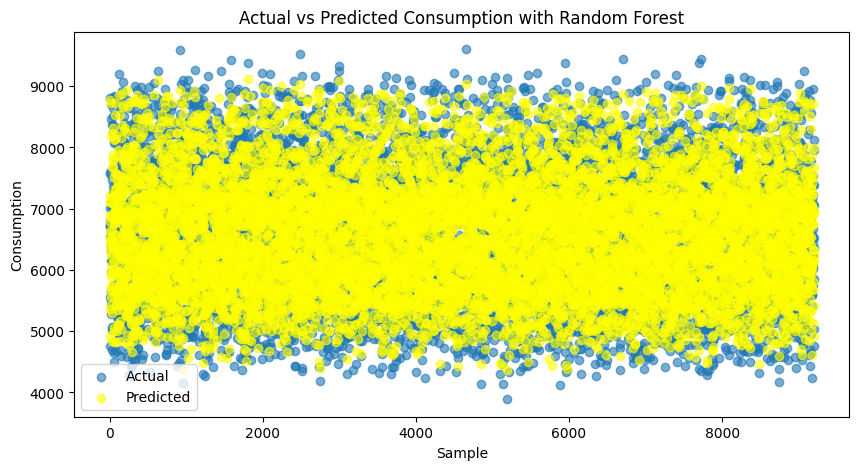

Classification Metrics for Production:
Accuracy: 0.9714223622731718
F1 Score: 0.9715460348371742



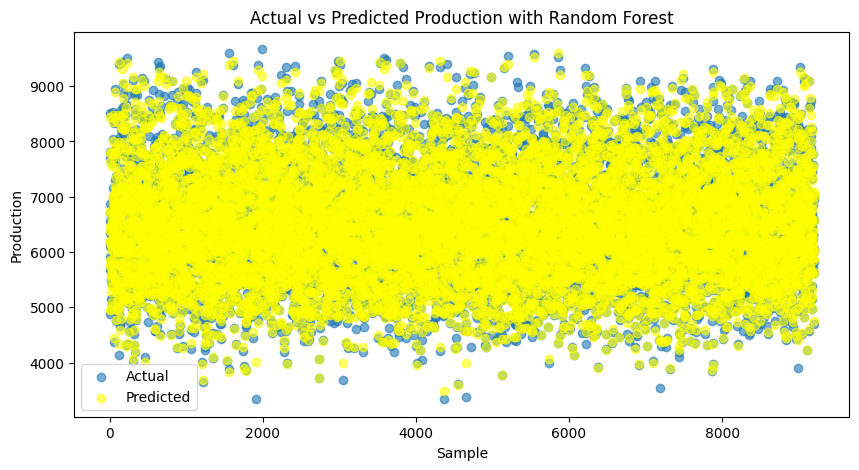

Classification Metrics for Nuclear:
Accuracy: 0.864718026730414
F1 Score: 0.8633519920974646



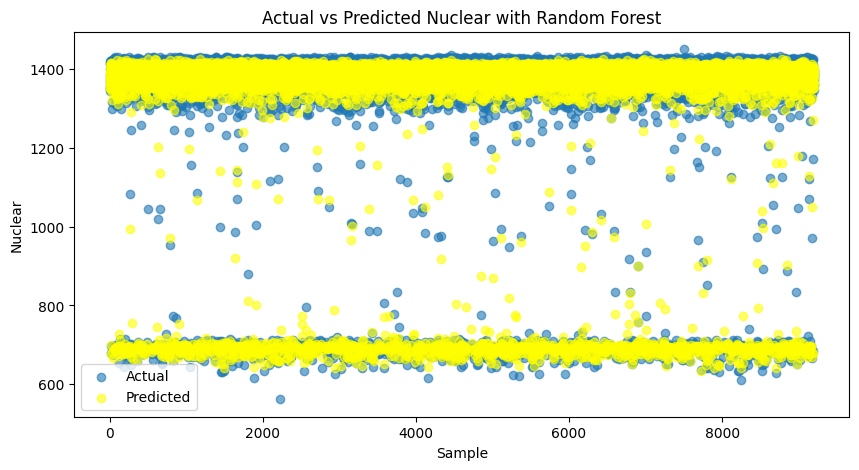

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Define features and target variables
features = ['Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass', 'Nuclear_Ratio', 'Wind_Ratio', 'Hydroelectric_Ratio', 'Oil and Gas_Ratio', 'Coal_Ratio', 'Solar_Ratio', 'Biomass_Ratio']
targets = ['Consumption', 'Production', 'Nuclear']

X = df[features]
y = df[targets]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
for i, target in enumerate(targets):
    print(f"Evaluation for {target}:")
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i], squared=False)
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print()


for i, target in enumerate(targets):
    threshold = np.median(y_test.iloc[:, i])
    y_test_binary = (y_test.iloc[:, i] > threshold).astype(int)
    y_pred_binary = (y_pred[:, i] > threshold).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    f1 = f1_score(y_test_binary, y_pred_binary)

    print(f"Classification Metrics for {target}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print()

    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(y_test)), y_test.iloc[:, i].values, label='Actual', alpha=0.6)
    plt.scatter(range(len(y_test)), y_pred[:, i], label='Predicted', color='yellow', alpha=0.6)
    plt.xlabel('Sample')
    plt.ylabel(target)
    plt.title(f'Actual vs Predicted {target} with Random Forest')
    plt.legend()
    plt.show()

